# Análise exploratória de dados

In [9]:
from IPython.display import display, Markdown
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

colors = ["#228B22", "#9370DB", "#A9A9A9"]
# sns.set_style("whitegrid")
sns.set_theme(style="ticks")
sns.set_palette(sns.color_palette(colors))

## 1. Leitura dos dados

In [3]:
df = pd.read_csv('../data/raw/data.csv')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## 2. Descrição dos dados

TIPS é um conjunto de dados que contém informações sobre gorjetas recebidas por um garçom no período de alguns meses trabalhando em um 
restaurante.

Essa base de dados possui 244 instâncias.

### 2.1. Dicionário de dados

In [4]:

dicionario = pd.read_csv('../data/external/dictionary.csv')
dicionario.head()

,variavel,descricao,tipo,subtipo
0,total_bill,valor total da conta,quantitativa,continua
1,tip,valor da gorjeta,quantitativa,continuo
2,sex,sexo da pessoa que pagou,qualitativa,nominal
3,smoker,se a pessoa que pagou é ou não fumante,qualitativa,nominal
4,day,o dia da semana que a pessoa comeu no restaurante,qualitativa,nominal


- São 7 variáveis, 4 qualitativas nominais, 2 quantitativas contínuas e 1 quantitativa discreta.

## 3. Perguntas de partida e hipóteses

- Existem dados faltantes, se sim quantos e em quais variáveis?
- Qual a distribuição dos dados (variável por variável)?
- Existe alguma relação entre valores da conta, sexo e dia da semana da refeição?
- Existe alguma relação entre os valores das contas, sexo e o fato de ser fumante?


#### Variáveis com dados faltantes

In [23]:

number_of_na_by_column = df.isnull().sum().loc[lambda x: x > 0]
number_of_na_rows = df.isnull().any(axis=1).sum()

display(number_of_na_by_column)
display(Markdown(
    "---\n"
    f"A partir dessa informação sabemos que as variáveis `{number_of_na_by_column.axes[0].to_list()}`"
    f"contém valores faltantes. Além disso sabemos que temos `{number_of_na_rows}` linhas com valores faltantes."
    "As próximas análises aqui serão realizadas sem considerar os dados faltantes"
    "\n\n ---"
))

df.dropna(inplace=True)

Series([], dtype: int64)

---
A partir dessa informação sabemos que as variáveis `[]`contém valores faltantes. Além disso sabemos que temos `0` linhas com valores faltantes.As próximas análises aqui serão realizadas sem considerar os dados faltantes

 ---

### Distribuição dos dados

In [6]:
df.describe(include='all')

,total_bill,tip,sex,smoker,day,time,size
count,244.000000,244.000000,244,244,244,244,244.000000
unique,NaN,NaN,2,2,4,2,NaN
top,NaN,NaN,Male,No,Sat,Dinner,NaN
freq,NaN,NaN,157,151,87,176,NaN
mean,19.785943,2.998279,NaN,NaN,NaN,NaN,2.569672
std,8.902412,1.383638,NaN,NaN,NaN,NaN,0.951100
min,3.070000,1.000000,NaN,NaN,NaN,NaN,1.000000
25%,13.347500,2.000000,NaN,NaN,NaN,NaN,2.000000
50%,17.795000,2.900000,NaN,NaN,NaN,NaN,2.000000
75%,24.127500,3.562500,NaN,NaN,NaN,NaN,3.000000


- Com essa visualização conseguimos compreender que existem 2 sexos disponíveis (Male ou Female), que em sua maioria são Male; 
- 2 respostas possíveis para smoker (Yes ou No), a maioria não fuma; 
- 4 possíveis dias da semana (Fri, Sat, Sun ou Thur), e percebemos que o dia mais frequente é o sábado; 
- e 2 possíveis horários de refeição (Dinner ou Lunch), vemos que a maioria vai jantar.

- Apenas visualizando essa tabela conseguimos perceber também que a menor mesa do restaurante é a com espaço para 1 pessoa e a maior é a 
mesa com 6 assentos.
- Percebemos também que a média das gorjetas dadas a esse garçom tem o valor de 2.99, com desvio padrão de 1.38, e que a maior gorjeta 
recebida por ele, foi no valor de $10.00.

##### Distribuição das variáveis qualitativas

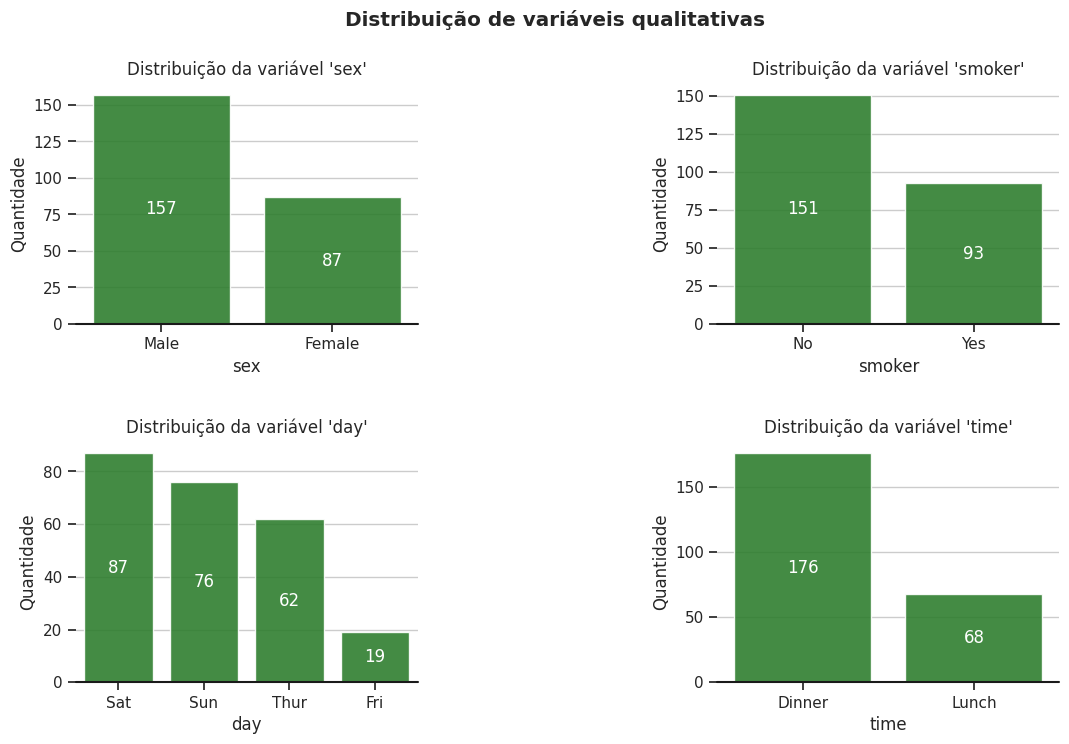

In [42]:
fig, axes = plt.subplots(2, 2, figsize=(12,8))
plt.tight_layout(pad=5, w_pad=15, h_pad=5)
fig.suptitle('Distribuição de variáveis qualitativas', fontweight='bold')
for i, variavel in enumerate(dicionario.query("tipo == 'qualitativa'").variavel.to_list()):
    order = df[variavel].value_counts().index
    ax = sns.countplot(
        data=df,
        x=variavel,
        ax=axes.flatten()[i],
        color=colors[0],
        alpha=0.9,
        order=order
    )
    ax.bar_label(
        ax.containers[0],
        fmt='%.0f',
        label_type='center',
        color='white'
    )
    ax.set(frame_on=False)
    ax.axhline(0, color="k", clip_on=False)
    ax.set_title(f"Distribuição da variável '{variavel}'")
    ax.set_ylabel('Quantidade')
    ax.grid(axis='y', linestyle='-')
plt.show()



##### Distribuição das variáveis quantitativas

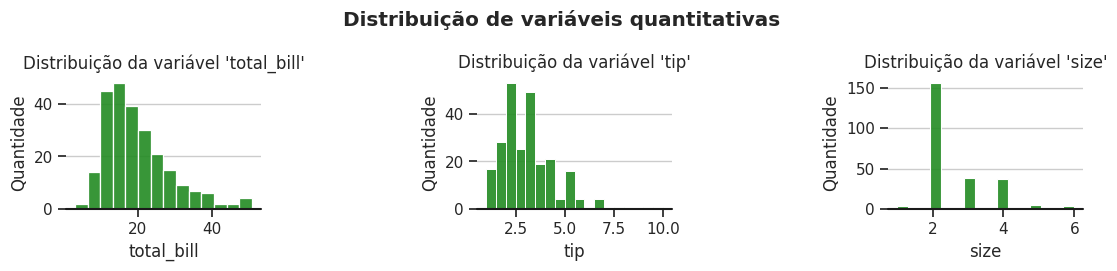

In [44]:
fig, axes = plt.subplots(1, 3, figsize=(12,3))
plt.tight_layout(pad=4, w_pad=10, h_pad=5)
fig.suptitle('Distribuição de variáveis quantitativas', fontweight='bold')
for i, variavel in enumerate(dicionario.query("tipo == 'quantitativa'").variavel.to_list()):
    ax = sns.histplot(
        data=df,
        x=variavel,
        ax=axes.flatten()[i],
        color=colors[0],
        alpha=0.9,
    )
    ax.set(frame_on=False)
    ax.axhline(0, color="k", clip_on=False)
    ax.set_title(f"Distribuição da variável '{variavel}'")
    plt.xlabel(variavel)
    ax.set_ylabel('Quantidade')
    ax.grid(axis='y', linestyle='-')
    # Customize grid to show only vertical lines
plt.show()


Com essa visualização da distribuição das variáveis quantitativas, podemos perceber alguns fatos:

- O valor da refeição da maioria dos clientes varia principalmente entre 10.00 e 20.00
- A maioria das gorjetas é de 2.00, 2.25, ou entre valores semelhantes
- Mais da metade das mesas do restaurante ocupadas nesse período de tempo foi ocupada por casais: de amigos, familiares (duas pessoas) e muito raramente as pessoas se alimentam sozinhas.

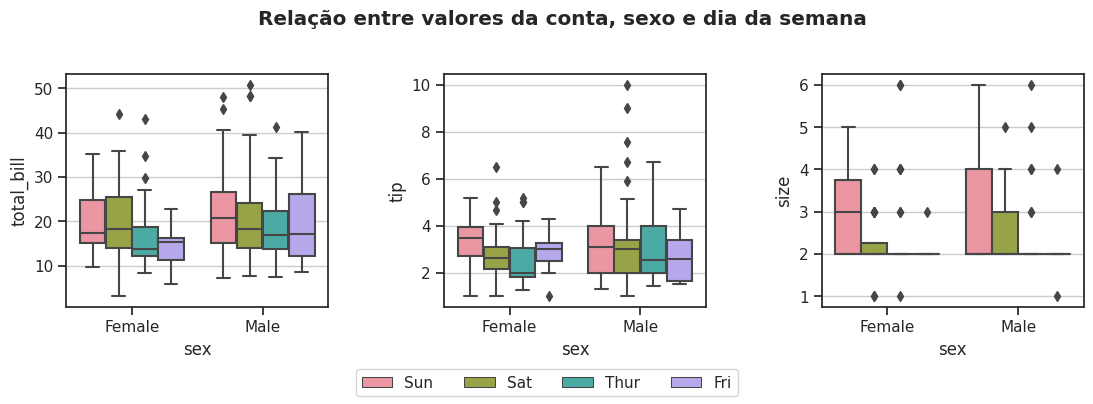

In [51]:
fig, axes = plt.subplots(1, 3, figsize=(12,4))
plt.tight_layout(pad=4, w_pad=4, h_pad=5)
fig.suptitle('Relação entre valores da conta, sexo e dia da semana', fontweight='bold')
for i, variavel in enumerate(dicionario.query("tipo == 'quantitativa'").variavel.to_list()):
    ax = sns.boxplot(
        x="sex", 
        y=variavel, 
        hue="day", 
        data=df, 
        ax=axes.flatten()[i]
    )
    handles, labels = plt.gca().get_legend_handles_labels()
    ax.grid(axis='y', linestyle='-')
    ax.legend([],[], frameon=False)
# sns.despine(offset=2, trim=True)
fig.legend(handles, labels, loc='lower center', ncol=4)
plt.show()

- Conseguimos perceber uma enorme quantidade de Outliers.
- Com essa visualização fica difícil extrair informações em relação aos tamanhos das mesas, mas notamos que às segundas as mulheres ocupam mesas maiores.

- Uma informação interessante é que a quinta feira é o dia, no geral, mais fraco para gorjetas!
- Percebemos também que, mesmo que por pouco, os homens costumam dar mais gorjetas.

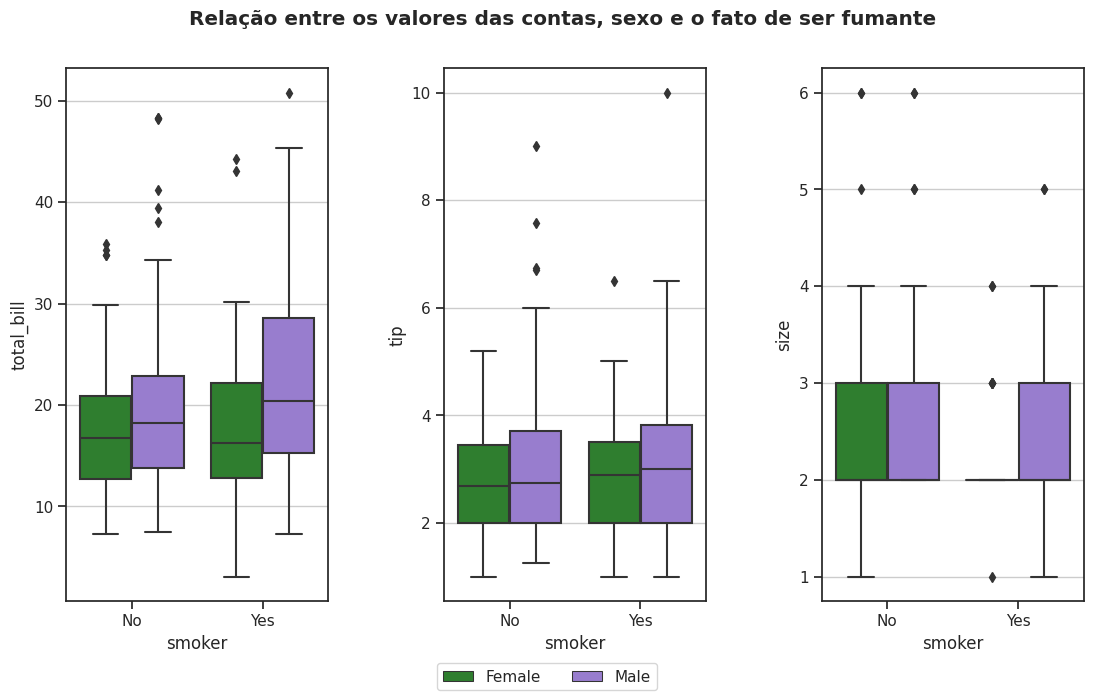

In [55]:
fig, axes = plt.subplots(1, 3, figsize=(12,7))
plt.tight_layout(pad=4, w_pad=4, h_pad=4)
fig.suptitle('Relação entre os valores das contas, sexo e o fato de ser fumante', fontweight='bold')
for i, variavel in enumerate(dicionario.query("tipo == 'quantitativa'").variavel.to_list()):
    ax = sns.boxplot(
        x="smoker", 
        y=variavel, 
        hue="sex", 
        data=df, 
        ax=axes.flatten()[i],
    )
    ax.grid(axis='y', linestyle='-')
    handles, labels = plt.gca().get_legend_handles_labels()
    ax.grid(axis='y', linestyle='-')
    ax.legend([],[], frameon=False)
# sns.despine(offset=2, trim=True)
fig.legend(handles, labels, loc='lower center', ncol=2)
plt.show()

- Aparentemente os homens fumantes comem mais caro do que o restante das pessoas...

- Porém, de resto, não conseguimos tirar muitas informações

## 4. Insights

A partir de toda essa análise, conseguimos tirar algumas conclusões:

- As pessoas não gostam muito de fazer suas refeições sozinhas;
- Por alguma razão, os homens dão gorjetas de valores mais discrepantes, os outliers são muito maiores do que os das mulheres nessa questão, que dão gorjetas de valores mais semelhantes;
- As mulheres, às quintas-feiras, gastam menos din